In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [28]:
class BatsmanState(TypedDict):
    balls: int
    runs: int
    fours: int
    sixes: int
    sr: float
    bpb: float
    boundary_percent: float
    summary: str


In [34]:
def calculate_sr(state: BatsmanState)-> BatsmanState:
    balls = state['balls']
    runs = state['runs']

    sr = (runs/balls) * 100

    # state['sr'] = sr
    
    # return state
    return {'sr': sr}


def calculate_bpb(state: BatsmanState)-> BatsmanState:
    balls = state['balls']
    fours = state['fours']
    sixes = state['sixes']

    bpb = balls/(fours + sixes)

    # state['bpb'] = bpb

    # return state

    return {'bpb': bpb}

def calculate_boundary_percent(state: BatsmanState)-> BatsmanState:
    boundary_percent = (((state['fours']*4) + (state['sixes']*6)) / state['runs']) * 100

    # state['boundary_percent'] = boundary_percent

    # return state
    return {'boundary_percent': boundary_percent}

def calculate_summary(state: BatsmanState)-> BatsmanState:
    summary = f'The batsman has strike rate of {state["sr"]}, balls per boundary count is {state["bpb"]} and have boundary percentage of {state["boundary_percent"]}'

    # state['summary'] = summary

    # return state

    return {'summary': summary}

In [35]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('calculate_summary', calculate_summary)

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')


graph.add_edge('calculate_sr', 'calculate_summary')
graph.add_edge('calculate_bpb', 'calculate_summary')
graph.add_edge('calculate_boundary_percent', 'calculate_summary')

graph.add_edge('calculate_summary', END)

workflow = graph.compile()

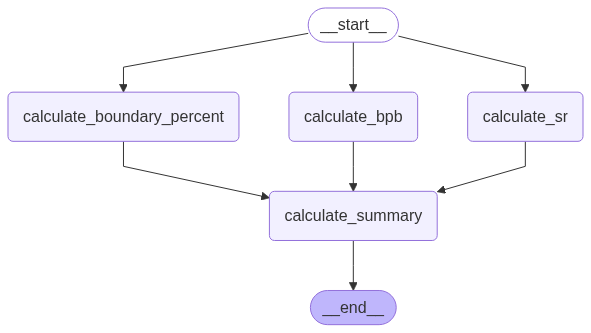

In [36]:
workflow

In [39]:
initial_state = {
    'balls': 200,
    'runs': 150,
    'fours': 15,
    'sixes': 10
}

In [40]:
workflow.invoke(initial_state)

{'balls': 200,
 'runs': 150,
 'fours': 15,
 'sixes': 10,
 'sr': 75.0,
 'bpb': 8.0,
 'boundary_percent': 80.0,
 'summary': 'The batsman has strike rate of 75.0, balls per boundary count is 8.0 and have boundary percentage of 80.0'}